In [112]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
from matplotlib.cm import get_cmap


In [113]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [ ]:
# set date format
date_format = "%Y/%m/%d %H:%M:%S%z"
# drop columns for Davidson and Huntersville
columns_to_remove = ['Davidson', 'Huntersville', 'Unknown']
# convert the "DATE_INCIDENT_BEGAN" column to datetime format
crimeDF['DATE_INCIDENT_BEGAN'] = pd.to_datetime(crimeDF['DATE_INCIDENT_BEGAN'], format=date_format, errors='coerce')

# filter the data to include only incidents between 2019 and 2023
startDate = pd.Timestamp("2017-01-01", tz='UTC')
endDate = pd.Timestamp("2023-12-31 23:59:59", tz='UTC')
crimeDF = crimeDF[(crimeDF['DATE_INCIDENT_BEGAN'] >= startDate) & (crimeDF['DATE_INCIDENT_BEGAN'] <= endDate)]

# extract the year and month from the "DATE_INCIDENT_BEGAN" column
crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')

# group the data by CMPD patrol division and YearMonth, then count the number of incidents
crimesPerMonth = crimeDF.groupby(['CMPD_PATROL_DIVISION', 'YearMonth']).size().reset_index(name='Crime Count')

# pivot the table to create columns for each patrol division and fill missing values with 0
crimeTable = crimesPerMonth.pivot(index='YearMonth', columns='CMPD_PATROL_DIVISION', values='Crime Count').fillna(0)

# Display the resulting table
crimeTable.drop(columns=columns_to_remove)
pd.set_option('display.max_rows', 70)
crimeTable

C:\Users\Tina\AppData\Local\Temp\ipykernel_2600\450647684.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')


CMPD_PATROL_DIVISION,Airport,Central,Eastway,Freedom,Hickory Grove,Independence,Metro,North,North Tryon,Providence,South,Steele Creek,University City,Westover
YearMonth,,,,,,,,,,,,,,
2017-01,77.0,462.0,581.0,649.0,543.0,545.0,613.0,699.0,753.0,488.0,454.0,722.0,818.0,529.0
2017-02,63.0,498.0,463.0,583.0,450.0,445.0,573.0,627.0,560.0,489.0,368.0,607.0,753.0,488.0
2017-03,79.0,477.0,480.0,610.0,501.0,461.0,595.0,638.0,625.0,413.0,424.0,699.0,683.0,526.0
2017-04,69.0,471.0,463.0,569.0,538.0,502.0,592.0,656.0,668.0,441.0,448.0,705.0,762.0,543.0
2017-05,97.0,548.0,550.0,620.0,580.0,517.0,664.0,777.0,725.0,504.0,452.0,792.0,771.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06,150.0,634.0,447.0,600.0,459.0,391.0,567.0,657.0,558.0,467.0,439.0,874.0,951.0,625.0
2023-07,143.0,600.0,483.0,594.0,434.0,452.0,561.0,710.0,532.0,543.0,398.0,941.0,941.0,657.0
2023-08,148.0,602.0,491.0,576.0,397.0,412.0,550.0,664.0,564.0,501.0,395.0,871.0,914.0,651.0


In [152]:
# Calculate the sum of incidents for each year
yearly_sum = crimeTable.resample('Y').sum()

# Calculate the difference in incidents from year to year
yearly_difference = yearly_sum.diff()

# Display the resulting DataFrame
yearly_difference

CMPD_PATROL_DIVISION,Airport,Central,Eastway,Freedom,Hickory Grove,Independence,Metro,North,North Tryon,Providence,South,Steele Creek,University City,Westover
YearMonth,,,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,157.0,-14.0,-94.0,-272.0,-272.0,-163.0,-26.0,-302.0,-687.0,-387.0,43.0,240.0,-153.0,271.0
2019,66.0,91.0,552.0,-65.0,198.0,-9.0,268.0,56.0,320.0,262.0,-205.0,1279.0,895.0,313.0
2020,-108.0,-856.0,-833.0,-533.0,-460.0,-409.0,-716.0,-314.0,-548.0,-919.0,-635.0,-834.0,-574.0,-529.0
2021,427.0,999.0,8.0,-108.0,-555.0,-301.0,-356.0,-21.0,-353.0,291.0,299.0,289.0,343.0,-100.0
2022,111.0,671.0,17.0,279.0,-39.0,-222.0,-122.0,301.0,25.0,486.0,241.0,872.0,385.0,1028.0
2023,-243.0,-1391.0,-1173.0,-940.0,-1048.0,-1154.0,-1178.0,-1805.0,-1068.0,-980.0,-1241.0,-1887.0,-1763.0,-1704.0


C:\Users\Tina\AppData\Local\Temp\ipykernel_2600\4139678298.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c')


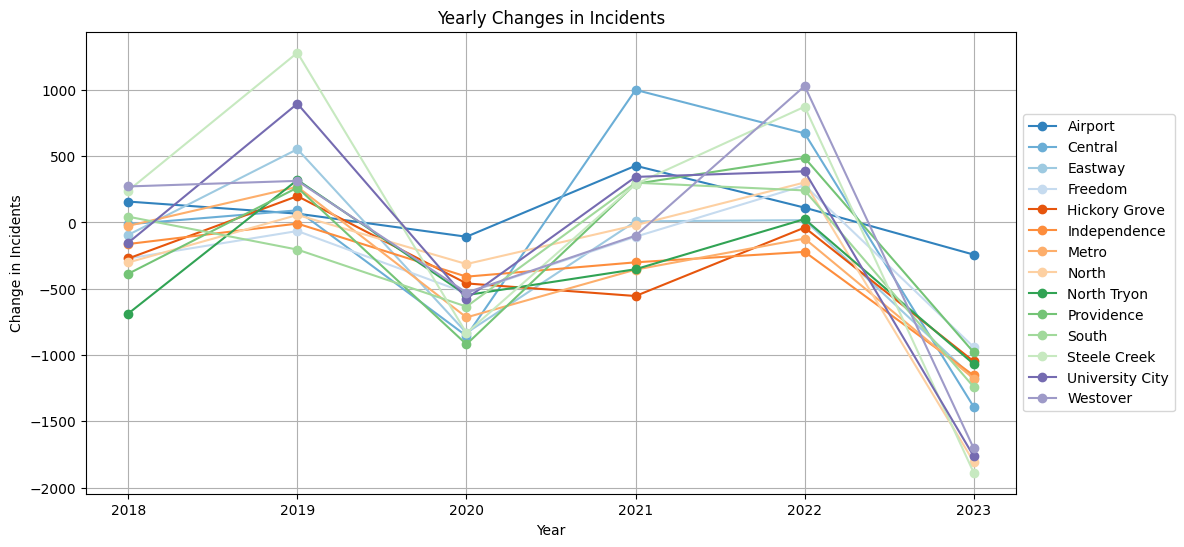

In [154]:
# Convert the period index to a list of strings representing years
year_labels = yearly_difference.index.to_timestamp().strftime('%Y')

# Create a line chart to visualize the yearly changes with distinct colors
plt.figure(figsize=(12, 6))

# Get a color map (you can choose any colormap you like)
cmap = get_cmap('tab20c')

# Iterate through each line and assign a distinct color
for i, col in enumerate(yearly_difference.columns):
    color = cmap(i)
    plt.plot(year_labels, yearly_difference[col], marker='o', linestyle='-', label=col, color=color)

plt.title('Yearly Changes in Incidents')
plt.xlabel('Year')
plt.ylabel('Change in Incidents')
plt.legend()  # Display the legend for each line

# Move the legend to the right side (adjust the coordinates as needed)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)

# Display the line chart
plt.show()

In [148]:
#Finding the crime numbers for 2017
df_2017 = crimeDF[crimeDF['YEAR'] == 2017]

incident_counts = df_2017['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

most_frequent_incidents = incident_counts.head(10) 

most_frequent_incidents


HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle        10300
All Other Offenses               9298
Simple Assault                   7845
All Other Thefts                 7839
Other Unlisted Non-Criminal      7469
Burglary/B&E                     5998
Damage/Vandalism Of Property     5971
Shoplifting                      4671
Drug/Narcotic Violations         3984
Motor Vehicle Theft              2783
Name: count, dtype: int64

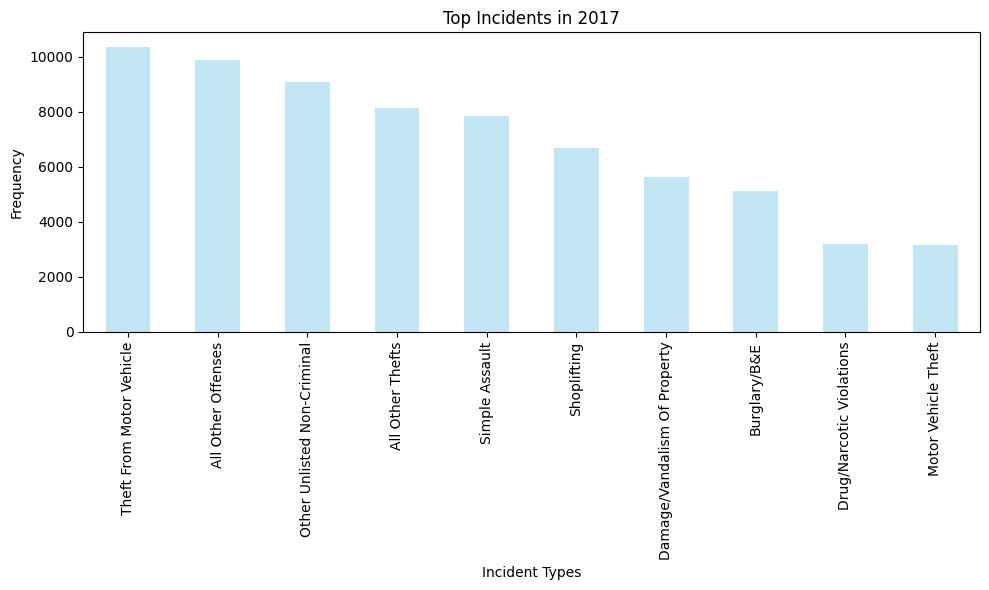

In [136]:
#plotting crime numbers for 2017
plt.figure(figsize=(10, 6)) 
most_frequent_incidents.plot(kind='bar', color='skyblue', alpha=0.5, align='center') 
plt.title('Top Incidents in 2017')
plt.xlabel('Incident Types')
plt.ylabel('Frequency') 
plt.tight_layout() 
plt.show()

In [140]:
#Finding the crime numbers for 2018
df_2018 = crimeDF[crimeDF['YEAR'] == 2018]

incident_counts = df_2018['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

most_frequent_incidents_2018 = incident_counts.head(10)  

most_frequent_incidents_2018

HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle        9451
All Other Offenses              9423
Other Unlisted Non-Criminal     8155
All Other Thefts                8033
Simple Assault                  7850
Shoplifting                     5795
Damage/Vandalism Of Property    5563
Burglary/B&E                    5233
Drug/Narcotic Violations        3517
Motor Vehicle Theft             3126
Name: count, dtype: int64

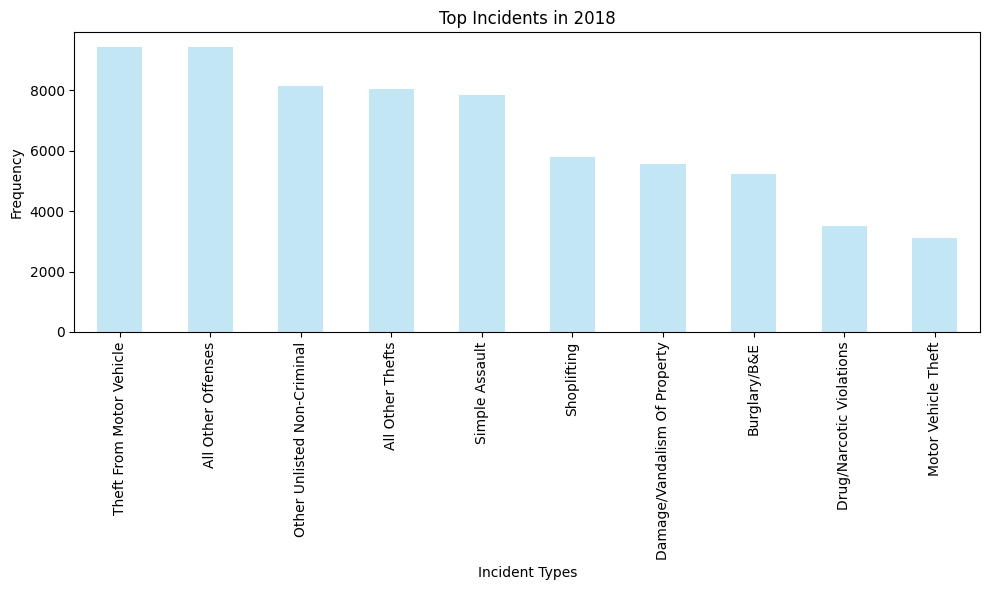

In [142]:
plt.figure(figsize=(10, 6))
most_frequent_incidents_2018.plot(kind='bar', color='skyblue', alpha=0.5, align='center')
plt.title('Top Incidents in 2018')
plt.xlabel('Incident Types')
plt.ylabel('Frequency') 
plt.tight_layout() 
plt.show()

In [143]:
#Finding the crime numbers for 2019
df_2019 = crimeDF[crimeDF['YEAR'] == 2019]

incident_counts = df_2019['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

most_frequent_incidents_2019 = incident_counts.head(10)  

most_frequent_incidents_2019

HIGHEST_NIBRS_DESCRIPTION
Theft From Motor Vehicle        10366
All Other Offenses               9895
Other Unlisted Non-Criminal      9071
All Other Thefts                 8136
Simple Assault                   7841
Shoplifting                      6680
Damage/Vandalism Of Property     5638
Burglary/B&E                     5132
Drug/Narcotic Violations         3213
Motor Vehicle Theft              3151
Name: count, dtype: int64

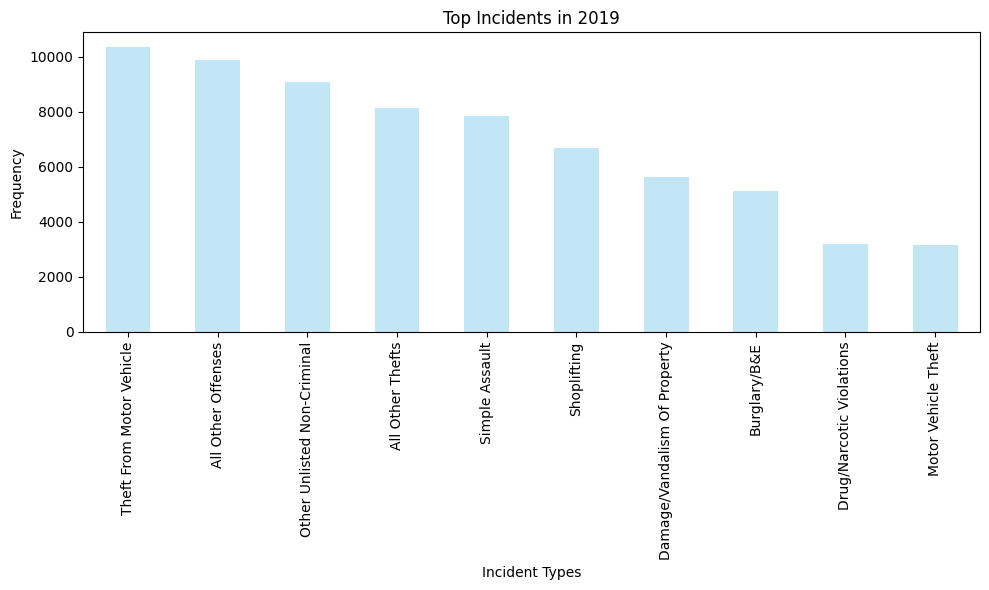

In [144]:
plt.figure(figsize=(10, 6))
most_frequent_incidents_2019.plot(kind='bar', color='skyblue', alpha=0.5, align='center') 
plt.title('Top Incidents in 2019')
plt.xlabel('Incident Types')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

In [169]:
#Finding the crime numbers for 2020
df_2020 = crimeDF[crimeDF['YEAR'] == 2020]

incident_counts = df_2020['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

most_frequent_incidents_2020 = incident_counts.head(10)  

most_frequent_incidents_2020

HIGHEST_NIBRS_DESCRIPTION
All Other Offenses              8833
Theft From Motor Vehicle        8460
Other Unlisted Non-Criminal     8140
Simple Assault                  7555
All Other Thefts                6988
Shoplifting                     6115
Damage/Vandalism Of Property    5454
Burglary/B&E                    4235
Aggravated Assault              3111
Motor Vehicle Theft             3069
Name: count, dtype: int64

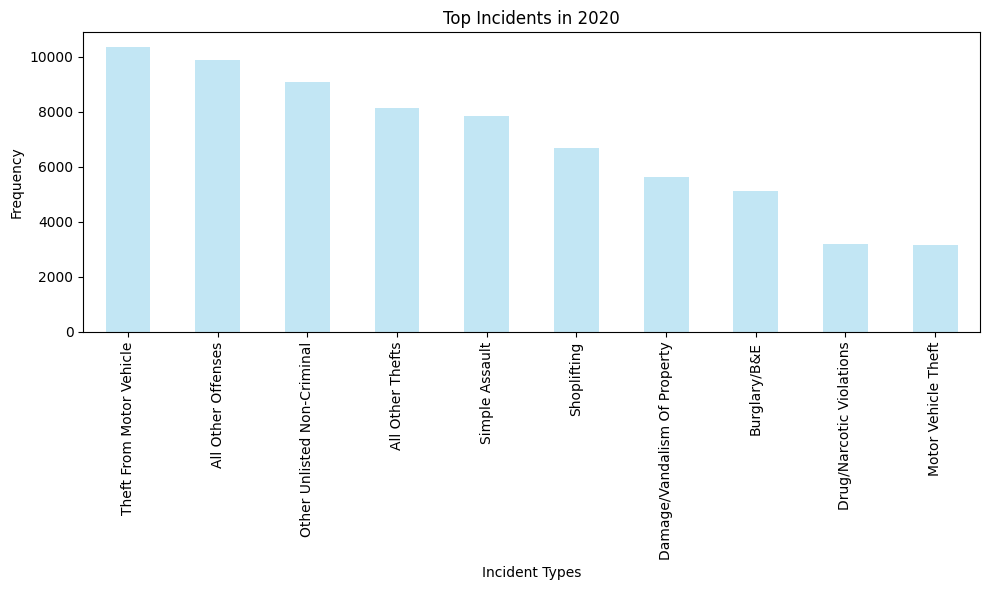

In [156]:
plt.figure(figsize=(10, 6))
most_frequent_incidents_2020.plot(kind='bar', color='skyblue', alpha=0.5, align='center') 
plt.title('Top Incidents in 2020')
plt.xlabel('Incident Types')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

In [170]:
#Finding the crime numbers for 2021
df_2021 = crimeDF[crimeDF['YEAR'] == 2021]

incident_counts = df_2021['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

most_frequent_incidents_2021 = incident_counts.head(10)  

most_frequent_incidents_2021

HIGHEST_NIBRS_DESCRIPTION
All Other Offenses              8966
Other Unlisted Non-Criminal     8281
Theft From Motor Vehicle        8170
Simple Assault                  7856
All Other Thefts                7335
Damage/Vandalism Of Property    5239
Shoplifting                     5021
Burglary/B&E                    3661
Drug/Narcotic Violations        3318
Motor Vehicle Theft             3210
Name: count, dtype: int64

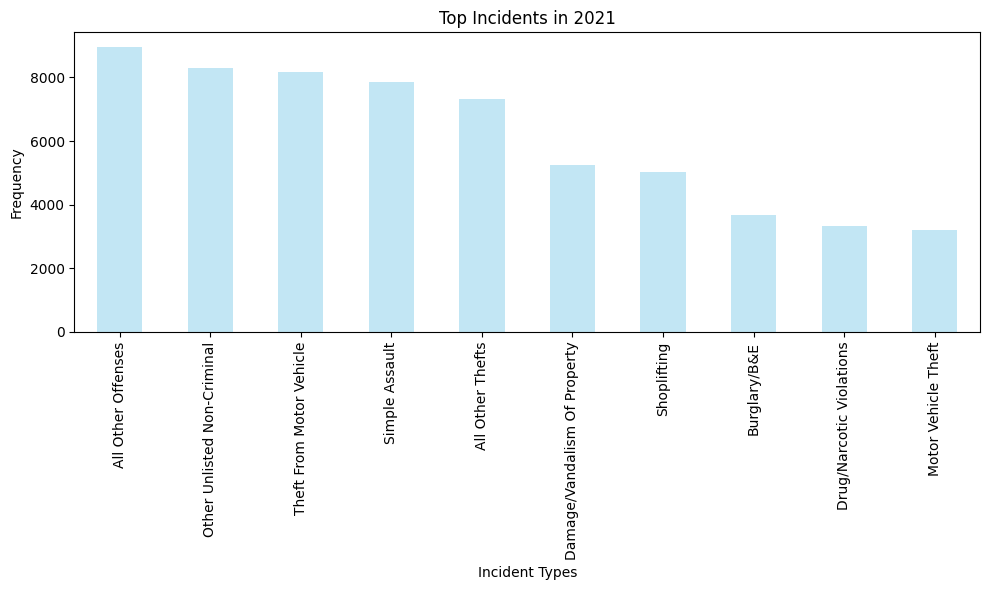

In [172]:
plt.figure(figsize=(10, 6))
most_frequent_incidents_2021.plot(kind='bar', color='skyblue', alpha=0.5, align='center') 
plt.title('Top Incidents in 2021')
plt.xlabel('Incident Types')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

In [173]:
#Finding the crime numbers for 2022
df_2022 = crimeDF[crimeDF['YEAR'] == 2022]

incident_counts = df_2022['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

most_frequent_incidents_2022 = incident_counts.head(10)  

most_frequent_incidents_2022

HIGHEST_NIBRS_DESCRIPTION
Other Unlisted Non-Criminal     9455
Theft From Motor Vehicle        8509
All Other Thefts                8493
All Other Offenses              8450
Simple Assault                  8027
Damage/Vandalism Of Property    5329
Shoplifting                     4964
Burglary/B&E                    3993
Motor Vehicle Theft             3859
Drug/Narcotic Violations        3580
Name: count, dtype: int64

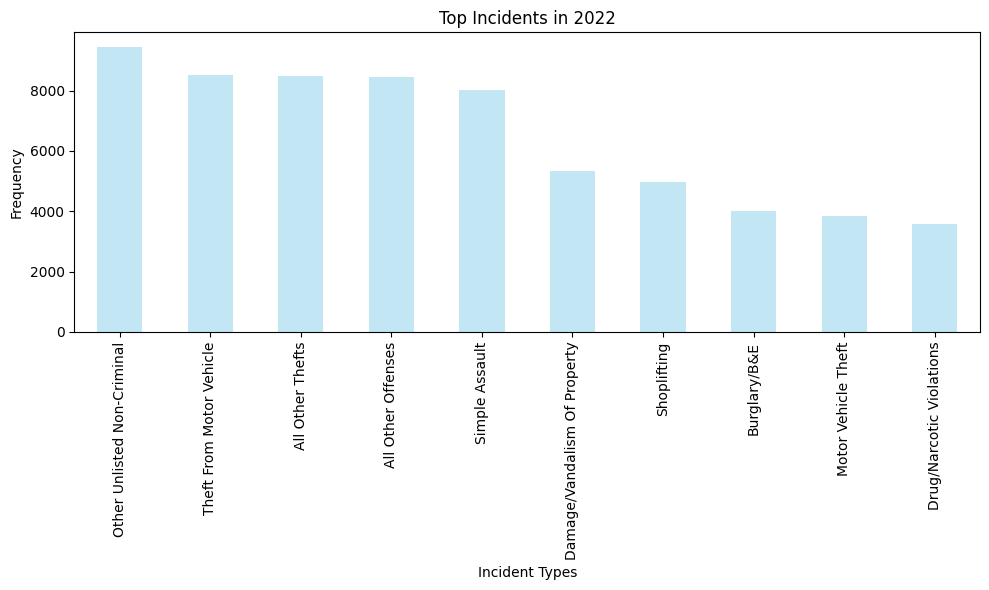

In [175]:
plt.figure(figsize=(10, 6))
most_frequent_incidents_2022.plot(kind='bar', color='skyblue', alpha=0.5, align='center') 
plt.title('Top Incidents in 2022')
plt.xlabel('Incident Types')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

In [145]:
# Filter the dataframe for the years 2015 to 2022
df_years = crimeDF[(crimeDF['YEAR'] >= 2017) & (crimeDF['YEAR'] <= 2023)]

# Count incidents for each year
incident_counts_by_year = df_years['YEAR'].value_counts().sort_index()

# Display the number of incidents by year
print("Number of Incidents by Year:")
print(incident_counts_by_year)

Number of Incidents by Year:
YEAR
2017    91150
2018    90832
2019    95183
2020    86866
2021    87914
2022    92330
2023    76558
Name: count, dtype: int64


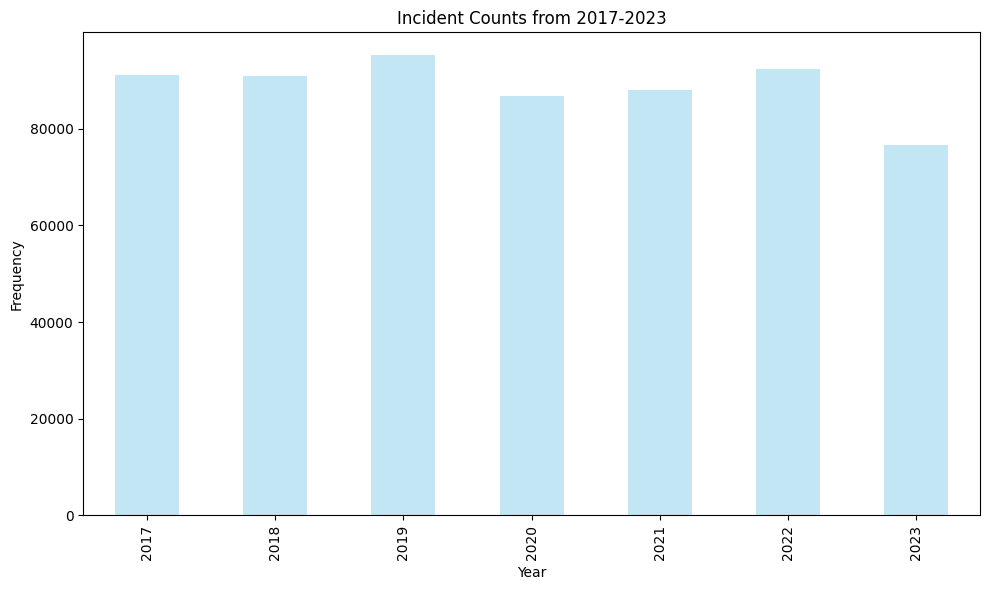

In [147]:
plt.figure(figsize=(10, 6))
incident_counts_by_year.plot(kind='bar', color='skyblue', alpha=0.5, align='center')
plt.title('Incident Counts from 2017-2023')
plt.xlabel('Year')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

In [176]:
# df_years = crimeDF[(crimeDF['YEAR'] >= 2017) & (crimeDF['YEAR'] <= 2023)]

# # Group the data by 'Year' and 'HIGHEST_NIBRS_DESCRIPTION', count occurrences, and unstack it
# incident_types_by_year = df_years.groupby(['YEAR', 'HIGHEST_NIBRS_DESCRIPTION']).size().unstack()

# # Plotting a bar graph for incident types from 2017 to 2023
# incident_types_by_year.plot(kind='bar', figsize=(12, 8))
# plt.title('Incident Types from 2017 to 2023')
# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.legend(title='Incident Types', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside for better visibility
# plt.tight_layout()
# plt.show()

In [161]:
#use Jacob's stunning dictionary to clean the data
typeReclass = {'HIGHEST_NIBRS_DESCRIPTION':
{
    'All Other Offenses':'Other', 'All Other Thefts':'Theft',
    'Theft of Motor Vehicle Parts from Vehicle':'Theft',
    'Sudden/Natural Death Investigation':'Other',
    'Theft From Motor Vehicle':'Theft',
    'Shoplifting':'Theft', 'Suicide':'Other', 'Other Unlisted Non-Criminal':'Other', 'Affray':'Violent Crime',
    'Missing Person':'Other', 'Simple Assault':'Violent Crime', 'Motor Vehicle Theft':'Theft', 'Intimidation':'Violent Crime',
    'Damage/Vandalism Of Property':'Violent Crime', 'Burglary/B&E':'Theft', 'Aggravated Assault':'Violent Crime',
    'Robbery':'Theft', 'Drug/Narcotic Violations':'Drug Related Crime', 'Trespass Of Real Property':'Other',
    'Credit Card/Teller Fraud':'Financial Crime', 'Impersonation':'Other', 'Forcible Fondling':'Sex Crime',
    'Identity Theft':'Other', 'Public Accident':'Response to Accident', 'Disorderly Conduct':'Other',
    'Weapon Law Violations':'Other', 'Overdose':'Response to Accident', 'Theft From Building':'Theft',
    'Extortion/Blackmail':'Other', 'Driving Under The Influence':'Drug Related Crime',
    'Hacking/Computer Invasion':'Other', 'False Pretenses/Swindle':'Financial Crime',
    'Counterfeiting/Forgery':'Financial Crime', 'Pocket-Picking':'Theft', 'Stolen Property Offenses':'Theft',
    'Forcible Rape':'Sex Crime', 'Indecent Exposure':'Sex Crime', 'Vehicle Recovery':'Response to Accident', 'Kidnapping':'Other',
    'Drug Equipment Violations':'Drug Related Crime', 'Embezzlement':'Financial Crime', 'Arson':'Violent Crime',
    'Pornography/Obscene Material':'Sex Crime', 'Fire (Accidental/Non-Arson)':'Response to Accident', 'Murder':'Violent Crime',
    'Family Offenses; Nonviolent':'Other', 'Statutory Rape':'Sex Crime', 'Purse-Snatching':'Theft',
    'Sexual Assault With Object':'Sex Crime', 'Wire Fraud':'Financial Crime', 'Animal Cruelty':'Violent Crime',
    'Dog Bite/Animal Control Incident':'Other', 'Liquor Law Violations':'Drug Related Crime', 'Peeping Tom':'Sex Crime',
    'Assisting Gambling':'Financial Crime', 'Curfew/Loitering/Vagrancy Violations':'Other',
    'Forcible Sodomy':'Sex Crime', 'Worthless Check: Felony (over $2000)':'Financial Crime',
    'Justifiable Homicide':'Violent Crime', 'Prostitution':'Sex Crime',
    'Human Trafficking, Involuntary Servitude':'Other',
    'Human Trafficking, Commercial Sex Acts':'Sex Crime',
    'Theft From Coin-Operated Machine Or Device':'Theft', 'Negligent Manslaughter':'Violent Crime',
    'Incest':'Sex Crime', 'Gambling Equipment Violations':'Financial Crime', 'Betting/Wagering':'Financial Crime',
    'Welfare Fraud':'Financial Crime', 'Purchasing Prostitution':'Sex Crime', 'Assisting Prostitution':'Sex Crime',
    'Gas Leak':'Response to Accident', 'Bribery':'Financial Crime'}}

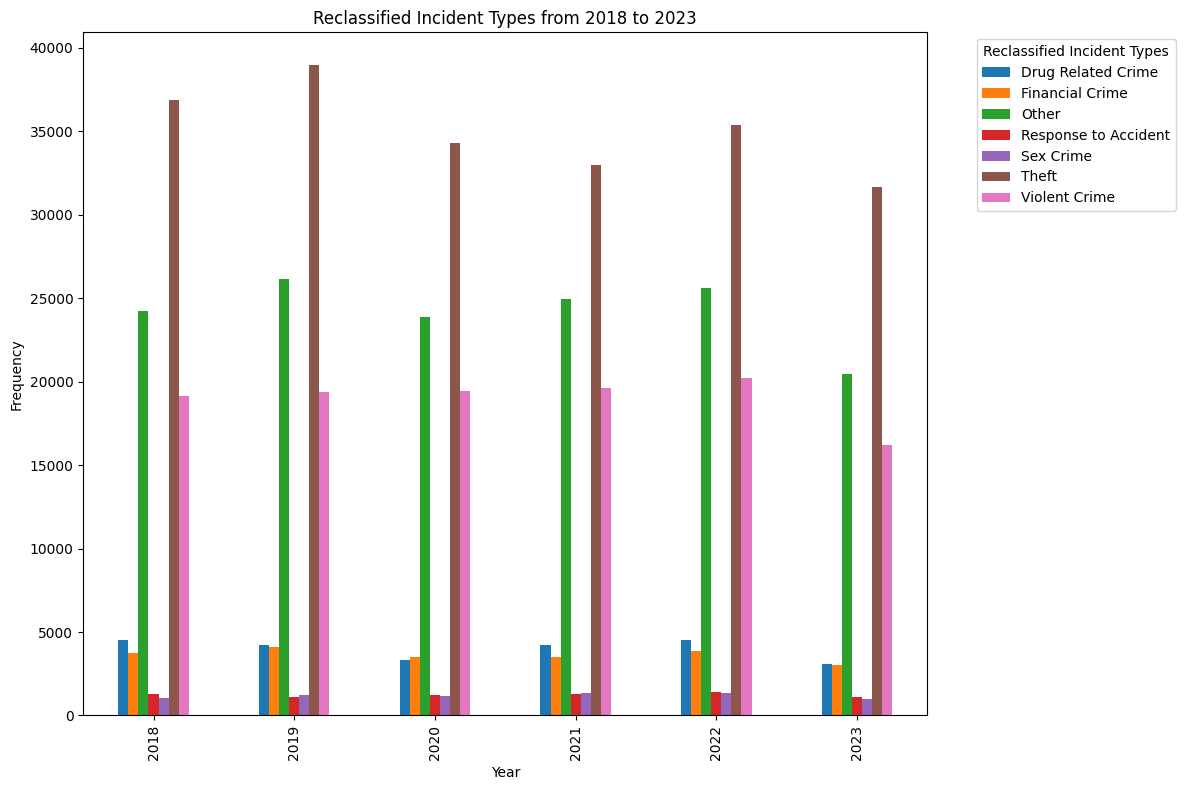

In [167]:
# typeReclass incident types based on the dictionary
crimeDF['Reclassified_Type'] = crimeDF['HIGHEST_NIBRS_DESCRIPTION'].map(typeReclass['HIGHEST_NIBRS_DESCRIPTION'])

# filter the dataframe for the years 2017 to 2023
yearsDF = crimeDF[(crimeDF['YEAR'] >= 2018) & (crimeDF['YEAR'] <= 2023)]

# Group the reclassified data by 'YEAR' and 'Reclassified_Type', count occurrences, and unstack it
reclassifiedTypesByYear = yearsDF.groupby(['YEAR', 'Reclassified_Type']).size().unstack()

# Plotting a bar graph for reclassified incident types from 2018 to 2023
reclassifiedTypesByYear.plot(kind='bar', figsize=(12, 8))
plt.title('Reclassified Incident Types from 2018 to 2023')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Reclassified Incident Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
crimeDF.drop("Davidson","Huntersville",axis==1)

In [149]:

# # Filter the dataframe for the years 2017 to 2022 and exclude Davidson and Huntersville divisions
# df_years_excluded = crimeDF[
#     ((crimeDF['YEAR'] >= 2018) & (crimeDF['YEAR'] <= 2023)) &
#     (~crimeDF['CMPD_PATROL_DIVISION'].isin(['Davidson', 'Huntersville', 'Unknown']))
# ]

# # Group the data by patrol division and year, count incidents, and unstack it for better visualization
# patrol_division_counts_excluded = df_years_excluded.groupby(['CMPD_PATROL_DIVISION', 'YEAR']).size().unstack()

# # Create a line chart for each patrol division's number of incidents from 2017-2022 (excluding Davidson and Huntersville)
# patrol_division_counts_excluded.plot(kind='bar', figsize=(12, 8))
# plt.title('Number of Incidents by Patrol Division (2018-2022, Excluding Davidson, Huntersville, and Unknown)')
# plt.xlabel('Year')
# plt.ylabel('Number of Incidents')
# plt.legend(title='Patrol Division')
# plt.show()